In [1]:
import pandas as pd
import numpy as np

In [2]:
# Reading dataset
ds=pd.read_csv(r"news.csv")
ds.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
# Checking for null values
ds.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [4]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
x=ds["text"]
le=LabelEncoder()
y=le.fit_transform(ds["label"])

In [5]:
# Splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [6]:
x_train.shape

(5068,)

In [7]:
# Initializing TF-IDF Vectorizer
# with document frequency 0.5
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words="english",max_df=0.5)

x_train_tfidf= tfidf.fit_transform(x_train)
x_test_tfidf=tfidf.transform(x_test)

In [8]:
x_train_tfidf.shape

(5068, 61710)

In [9]:
# Initializing PassiveAggressive Classifier
# with 50 iterations
from sklearn.linear_model import PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)

pac.fit(x_train_tfidf,y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [10]:
# Prediction
y_pred=pac.predict(x_test_tfidf)

In [11]:
# Getting Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9344909234411997

In [12]:
# Getting Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[573,  42],
       [ 41, 611]], dtype=int64)

In [13]:
# Getting roc
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)

Text(0, 0.5, 'tpr')

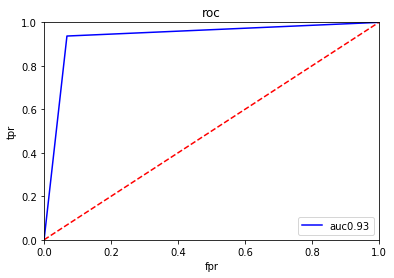

In [14]:
# Plotting roc
import matplotlib.pyplot as plt
plt.title("roc")
plt.plot(fpr,tpr,'b',label="auc%0.2f"%roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("fpr")
plt.ylabel("tpr")

# Done